# Introduction to neural network classification with TensorFLow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

## Create data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

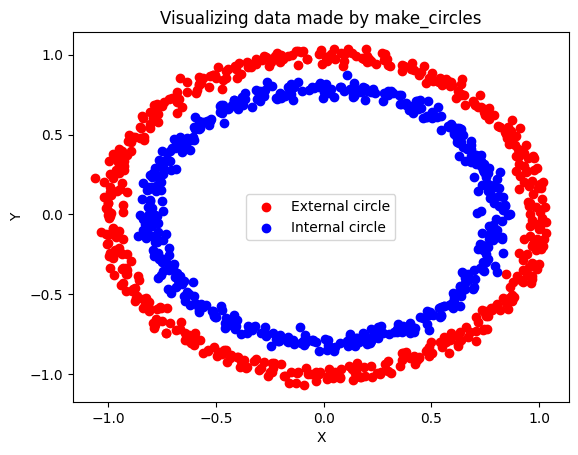

In [3]:
# visualizing data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='External circle')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Internal circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualizing data made by make_circles')
plt.legend()
plt.show()

## Input and output shapes

In [4]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(800, 200)

In [6]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer="SGD",
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
25/25 [==============================] - 1s 2ms/step - loss: 4.5443 - accuracy: 0.4663
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 3.9931 - accuracy: 0.4737
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 2.7916 - accuracy: 0.4800
Epoch 4/5
25/25 [==============================] - 0s 2ms/step - loss: 0.7482 - accuracy: 0.4950
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.4925


In [7]:
# Let's try and improve our model by training for longer...
model_1.fit(X_train, y_train, epochs=200, verbose=0)
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4550


[0.6945397853851318, 0.45500001311302185]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as it's guessing.

So let's step things up a notch and add an extra layer

In [8]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer="SGD",
                metrics=["accuracy"])

# 3. fit the mode;
model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4850


[0.6936676502227783, 0.48500001430511475]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model
1. Create a model - we migth add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might choose a diferrente optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
# 4. evaluate the model
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.4700


[0.7055351138114929, 0.4699999988079071]

To visualize our model's predictions, let's create a function `plot_decision_boundry()`, this function will:

* Take in a trained model, features X and labels y
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [12]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


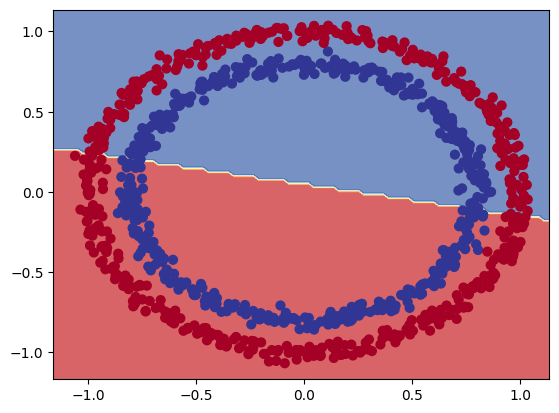

In [13]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [14]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training a test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [15]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 344.7646 - mae: 344.7646
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 212.9156 - mae: 212.9156
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 87.7209 - mae: 87.7209
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 64.6012 - mae: 64.6012
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 82.2777 - mae: 82.2777
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 56.5123 - mae: 56.5123
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.0739 - mae: 45.0739
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 44.6118 - mae: 44.6118
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 44.1006 - mae: 44.1006
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.1286 - mae: 43.1286
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


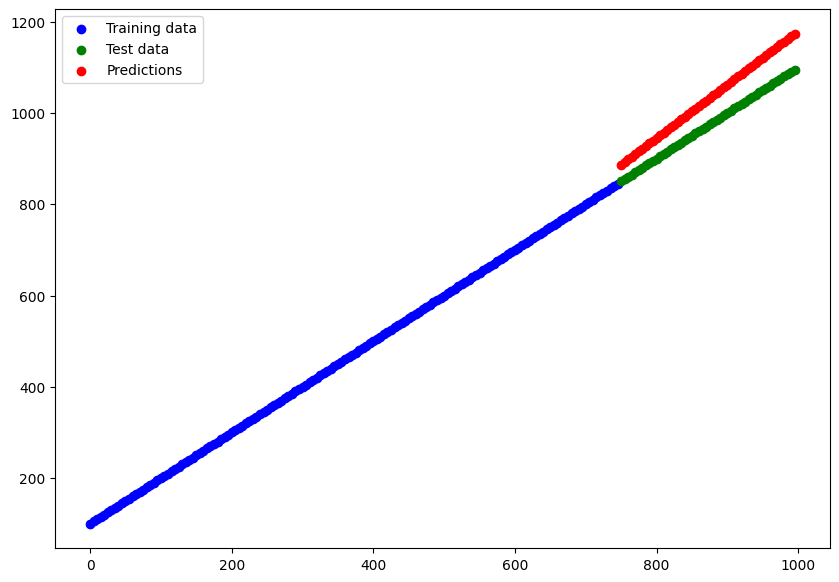

In [16]:
# Make predicctions whit our trained model
y_reg_preds = model_3.predict(X_reg_test)

#Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X_train, y_train, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


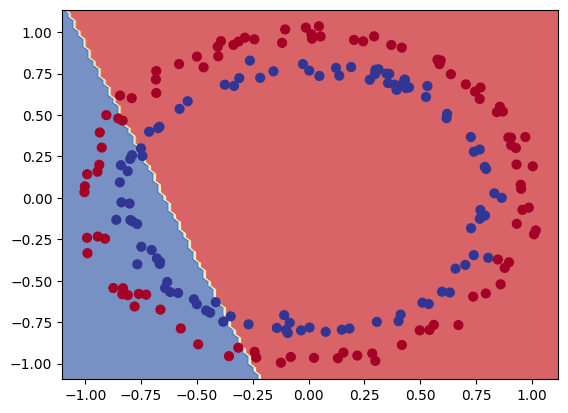

In [18]:
# Check the decision boundary for our lastest model
plot_decision_boundary(model=model_4,
                       X=X_test,
                       y=y_test)

Let's try to build our first neural network with a non-linear activation function

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X_train, y_train, epochs=100, verbose=0)

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_6.fit(X_train, y_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


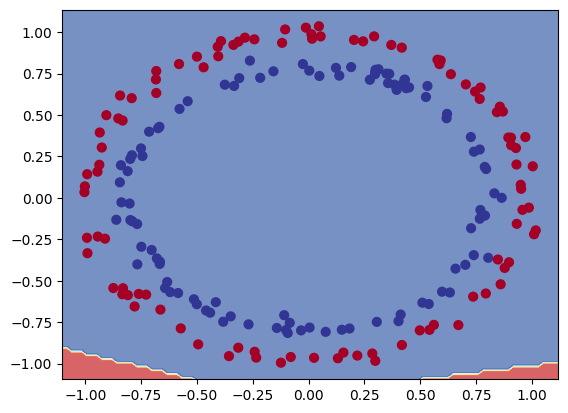

In [21]:
# How do our model predictios look
plot_decision_boundary(model_6, X_test, y_test)

In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# 3. Fit the model
history = model_7.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6882 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6877 - accuracy: 0.5063
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5675
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5362
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5300
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6855 - accuracy: 0.5312
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5362
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5362
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.5387
Epoch 10/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6832 - accuracy: 0.5462
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


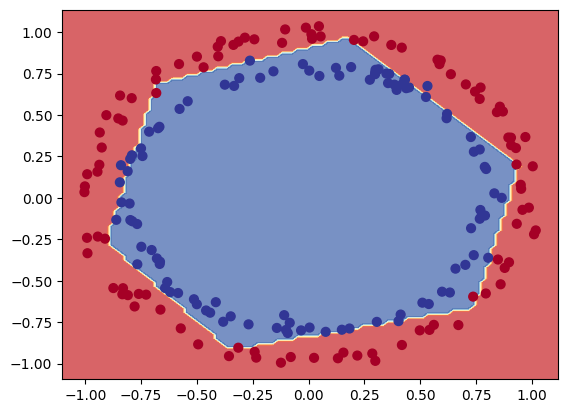

In [23]:
plot_decision_boundary(model_7, X_test, y_test)

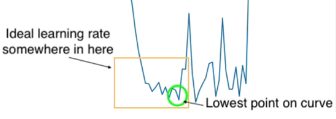🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [24]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

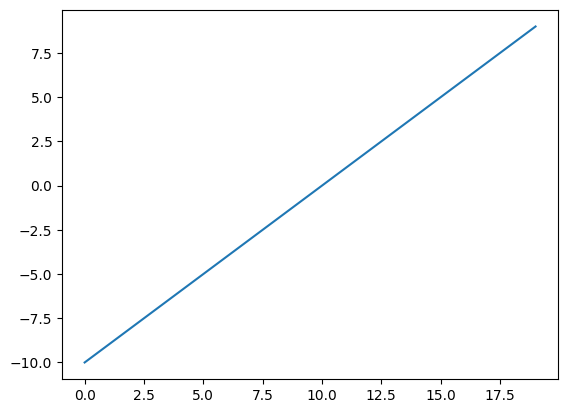

In [25]:
# Plot our toy tensor
plt.plot(A)

In [26]:
# Let's strat by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

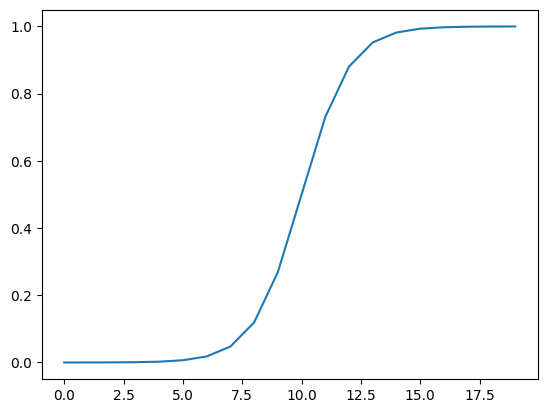

In [27]:
# Plot our toy tensor transformed by sigmoid:
plt.plot(sigmoid(A))

In [28]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Use the relu function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

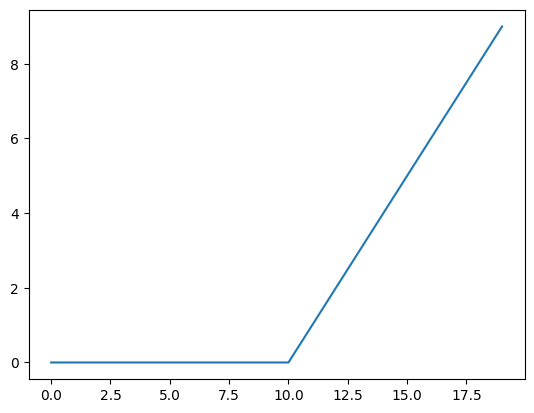

In [29]:
# Plot relu modifoed tensor
plt.plot(relu(A))

In [30]:
# Let's try a linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

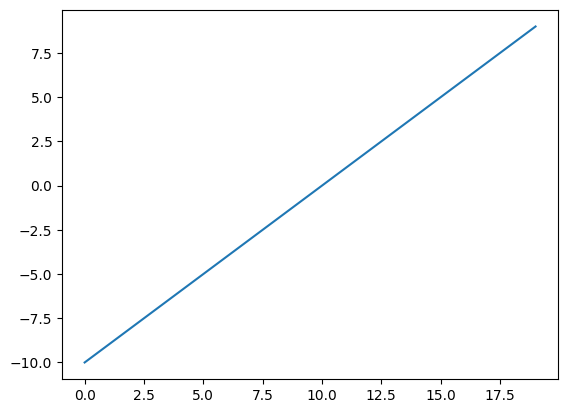

In [31]:
# Does the linear modify our tensor?
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving our clasification model

In [32]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model (increase learning rate)
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model (less epochs)
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7132 - accuracy: 0.4538
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.4525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4575
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5025
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4925
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4875
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4625
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4775
Epoch 11/25
25/25 [

In [33]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931490898132324, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


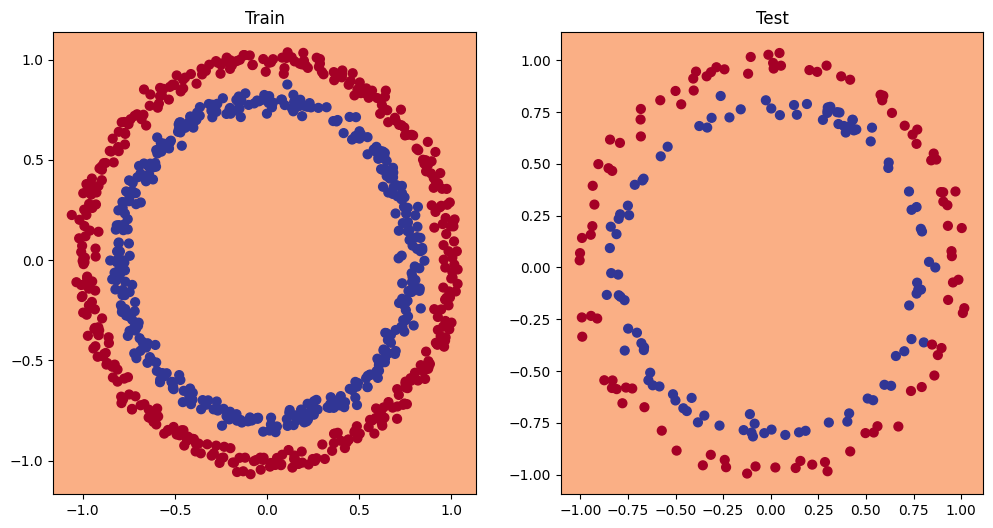

In [34]:
# Plot the decision boundaties for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

## Plot the loss (or training) curves

In [35]:
# Convert the history object into a DataFrame
df_history = pd.DataFrame(history.history)
df_history

,loss,accuracy
0,0.713152,0.45375
1,0.699615,0.45250
2,0.693650,0.50000
3,0.694033,0.45750
4,0.693549,0.50250
5,0.693258,0.50000
6,0.693224,0.49250
7,0.693268,0.48750
8,0.693671,0.46250
9,0.693318,0.47750


Text(0.5, 1.0, 'Model_8 curves')

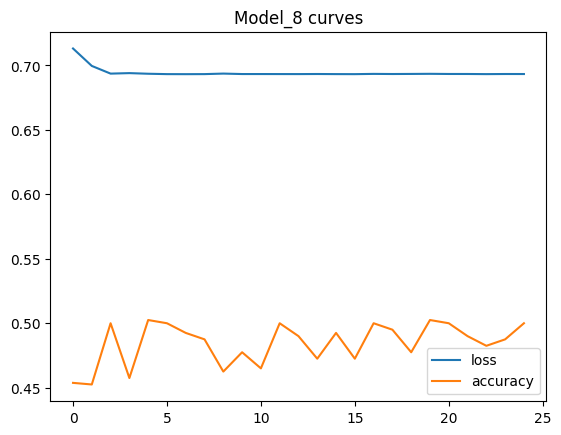

In [36]:
# Plot the curves
df_history.plot()
plt.title("Model_8 curves")

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels.

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your model *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [37]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [38]:
initial_lr = 1e-4
for epoch in range(20):
    lr = initial_lr * 10**(epoch / 20)
    print(f"Epoch {epoch}: Learning rate = {lr}")

Epoch 0: Learning rate = 0.0001
Epoch 1: Learning rate = 0.00011220184543019634
Epoch 2: Learning rate = 0.00012589254117941674
Epoch 3: Learning rate = 0.00014125375446227543
Epoch 4: Learning rate = 0.00015848931924611136
Epoch 5: Learning rate = 0.0001778279410038923
Epoch 6: Learning rate = 0.00019952623149688796
Epoch 7: Learning rate = 0.00022387211385683394
Epoch 8: Learning rate = 0.000251188643150958
Epoch 9: Learning rate = 0.0002818382931264454
Epoch 10: Learning rate = 0.000316227766016838
Epoch 11: Learning rate = 0.00035481338923357554
Epoch 12: Learning rate = 0.00039810717055349724
Epoch 13: Learning rate = 0.0004466835921509632
Epoch 14: Learning rate = 0.0005011872336272722
Epoch 15: Learning rate = 0.0005623413251903491
Epoch 16: Learning rate = 0.0006309573444801934
Epoch 17: Learning rate = 0.0007079457843841379
Epoch 18: Learning rate = 0.0007943282347242816
Epoch 19: Learning rate = 0.0008912509381337455


In [39]:
# 3. Fit the model
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7048 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

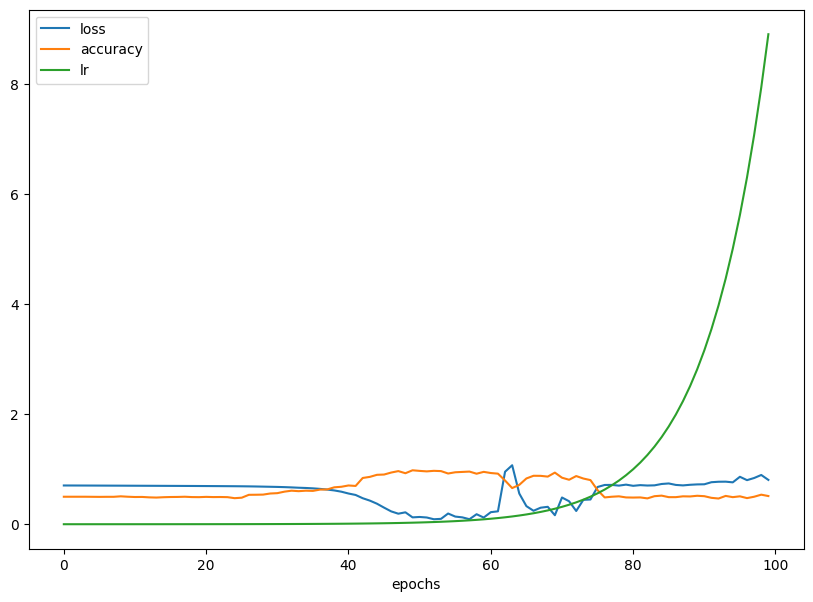

In [40]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

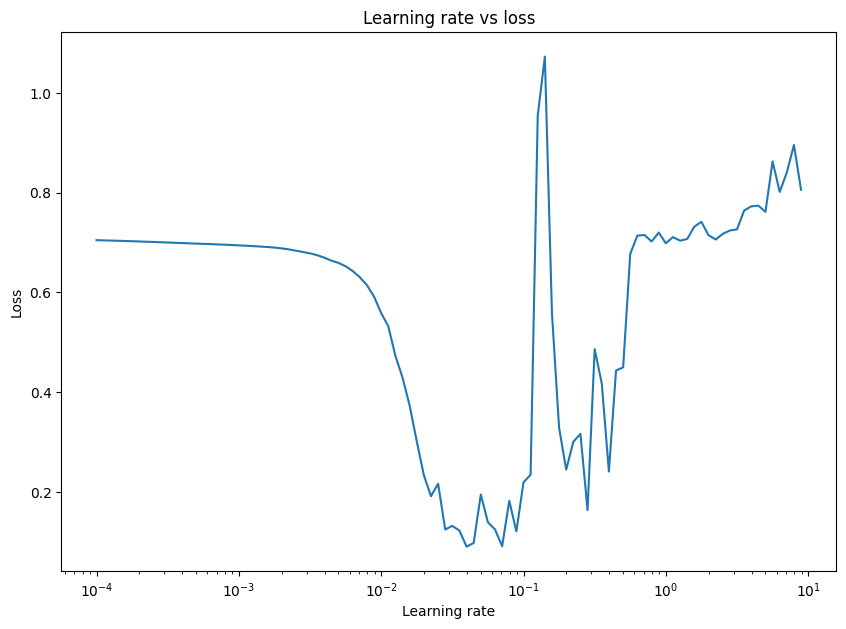

In [41]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

🔑 **Note:** The ideal learning rate is usally x10 smaller than the lowest point on the curve.

In [42]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [43]:
# Set random seed

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model (using ideal learning rate)
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.7008 - accuracy: 0.4725
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5063
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5225
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5400
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5650
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.5962
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6325
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.6612
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.6000
Epoch 11/20
25/25 [

In [44]:
# Evaluate model 10 and 8 on the test dataset
model_10.evaluate(X_test, y_test), model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000


([0.6329643130302429, 0.6449999809265137], [0.6931490898132324, 0.5])

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


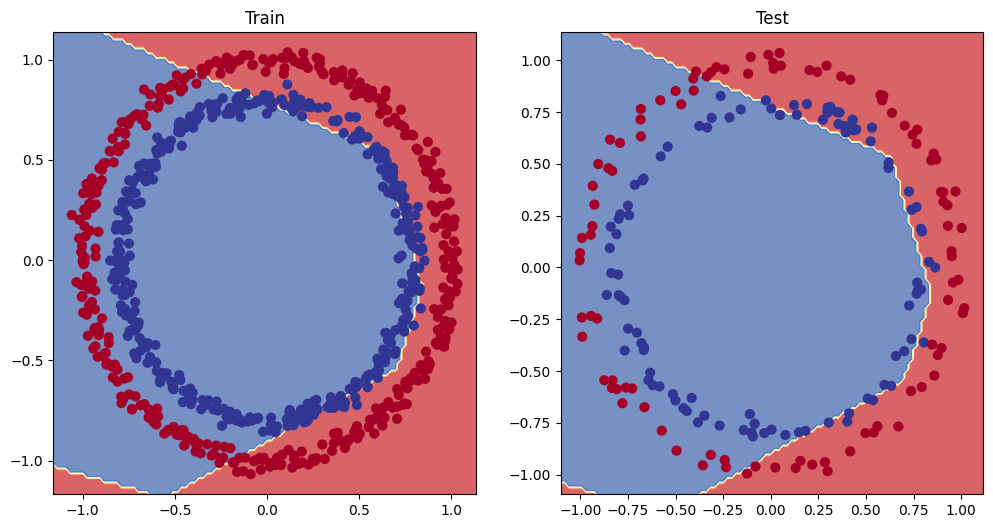

In [45]:
# Plot the decision boundaties for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (Build a text report showing the main classification metrics)

In [46]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6450
Model loss on the test set: 0.6329643130302429
Model accuracy on the test set: 64.50%


How about a confusion matrix?

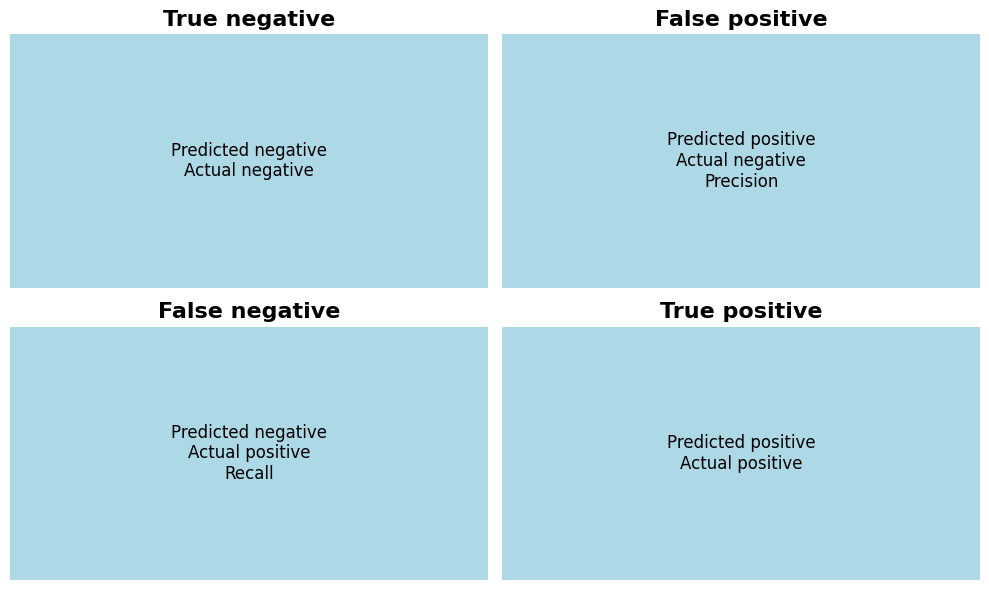

In [47]:
import matplotlib.patches as patches

# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Definir los títulos y los textos de cada cuadro
titles = ['True negative', 'False positive', 'False negative', 'True positive']
texts = [
    'Predicted negative\nActual negative',
    'Predicted positive\nActual negative\nPrecision',
    'Predicted negative\nActual positive\nRecall',
    'Predicted positive\nActual positive'
]

# Colores para cada cuadro
colors = ['#ADD8E6', '#ADD8E6', '#ADD8E6', '#ADD8E6']

for ax, title, text, color in zip(axs.flat, titles, texts, colors):
    ax.add_patch(patches.Rectangle((0, 0), 1, 1, color=color))
    ax.text(0.5, 0.5, text, va='center', ha='center', fontsize=12, wrap=True)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [48]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [49]:
y_preds[:10]

array([[0.6804171 ],
       [0.01780156],
       [0.6804171 ],
       [0.17018113],
       [0.19279517],
       [0.5324749 ],
       [0.00180291],
       [0.00073442],
       [0.6804171 ],
       [0.00957259]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [50]:
# Convert predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [51]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[62, 38],
       [33, 67]])

How about we prettify our confusion matrix?

In [52]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

import itertools

def plot_confusion_matrix(y_true, y_preds, classes=None, figsize=(10, 10), text_size=15):
    """
    Plots a confusion matrix using the true and predicted labels.

    Args:
    y_true (array-like): True labels.
    y_preds (array-like): Predicted labels.
    classes (list, optional): List of class names. If None, class labels will be inferred from y_true.
    figsize (tuple, optional): Figure size. Defaults to (10, 10).
    """

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_preds)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

    plt.show()

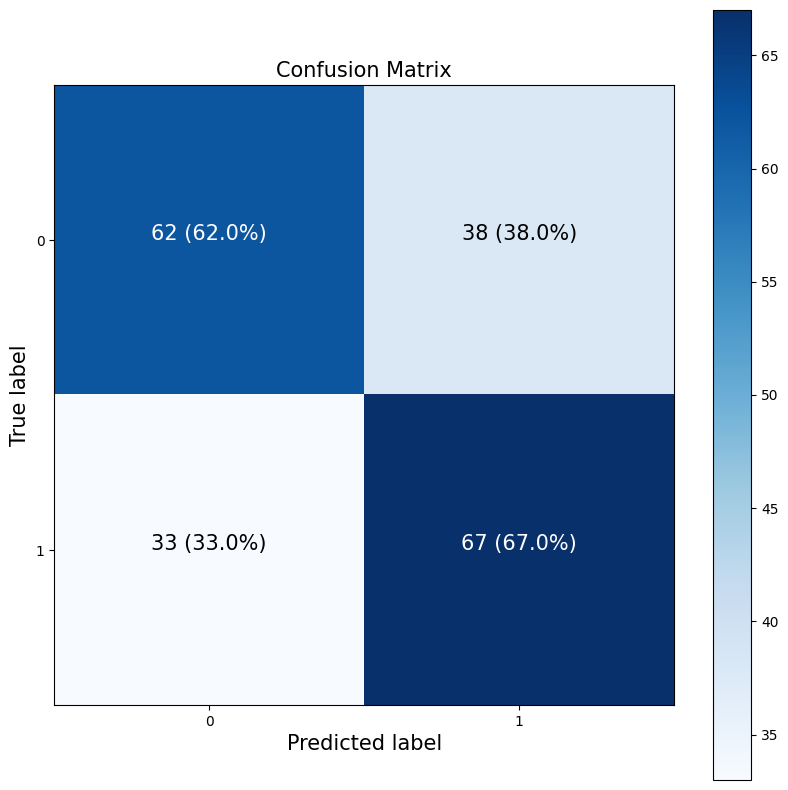

In [53]:
plot_confusion_matrix(y_test, tf.round(y_preds))

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**

To practice multi-class classification, we're going to build a nerual network to classify images of different items of clothing.

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [55]:
# Show the first training example
print(f"Training sample:\n{X_train[0]}\n")
print(f"Training label:\n{y_train[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [56]:
# Check the shape of a single example
X_train[0].shape, y_train[0].shape

((28, 28), ())

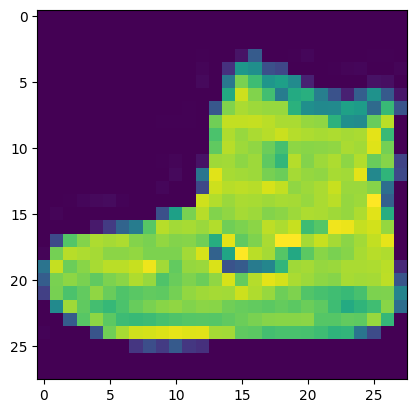

In [57]:
# Plot a single image
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [58]:
# Check out samples label
y_train[0]

9

In [59]:
# Create a small list so we can index onto training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

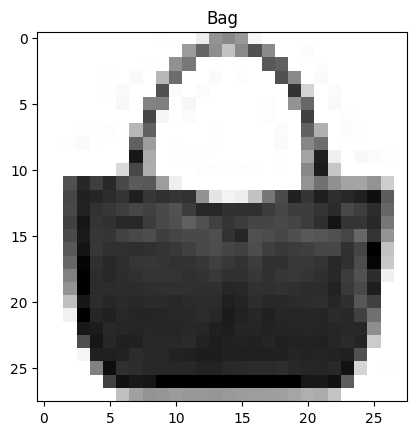

In [60]:
# Plot an example image and its label
index_of_choice = 100
plt.imshow(X_train[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[y_train[index_of_choice]])


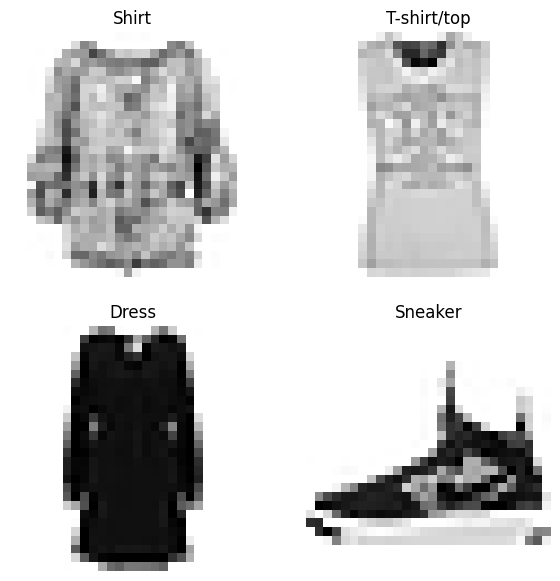

In [61]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Output layer activation = softmax
* Loss function = tf.keras.losses.CategoricalClassification()
  * If your labels are one-hot encoded, use CategoricalClassification()
  * If you labels are integer form use SparseCategoricalClassification

In [62]:
# Our data needs to be flattened (from 28x28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [63]:
y_train_oh = tf.one_hot(y_train, depth=10)
y_test_oh = tf.one_hot(y_test, depth=10)

In [64]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="categorical_crossentropy", # tf.keras.losses.CategoricalCrossentropy()
                metrics=["accuracy"])

# 3. Fit the model
non_norm_hisotry = model_1.fit(X_train,
                               y_train_oh,
                               epochs=10,
                               validation_data=(X_test, y_test_oh))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3210 - accuracy: 0.1392 - val_loss: 2.1222 - val_accuracy: 0.1792
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1005 - accuracy: 0.1761 - val_loss: 2.1022 - val_accuracy: 0.1732
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0753 - accuracy: 0.1852 - val_loss: 2.1152 - val_accuracy: 0.1710
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0074 - accuracy: 0.2025 - val_loss: 1.8169 - val_accuracy: 0.2493
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7249 - accuracy: 0.2589 - val_loss: 1.6892 - val_accuracy: 0.2694
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6281 - accuracy: 0.2998 - val_loss: 1.5930 - val_accuracy: 0.3215
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5704 - accuracy: 0.3211 - val_loss: 1.5491 - val_accuracy:

In [65]:
# Check the model summary
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# Check the min and max value of the training data
X_train.min(), X_train.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [67]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Check the min and max values of the scaled training data
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [68]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(optimizer="Adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

# Fit the model (using normalized data)
norm_history = model_2.fit(X_train_norm,
                           y_train,
                           epochs=10,
                           validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.6721 - accuracy: 0.3801 - val_loss: 1.3015 - val_accuracy: 0.4977
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1797 - accuracy: 0.5263 - val_loss: 1.1205 - val_accuracy: 0.5309
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0673 - accuracy: 0.5483 - val_loss: 1.0508 - val_accuracy: 0.5391
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0198 - accuracy: 0.5544 - val_loss: 1.0141 - val_accuracy: 0.5534
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9920 - accuracy: 0.5616 - val_loss: 1.0056 - val_accuracy: 0.5596
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9704 - accuracy: 0.5732 - val_loss: 1.0149 - val_accuracy: 0.5539
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9387 - accuracy: 0.6073 - val_loss: 0.9352 - val_accuracy:

🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

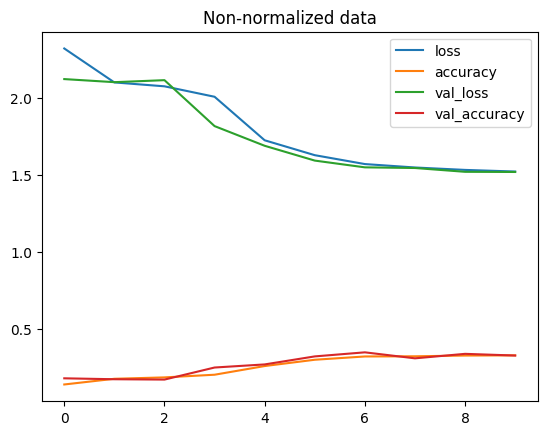

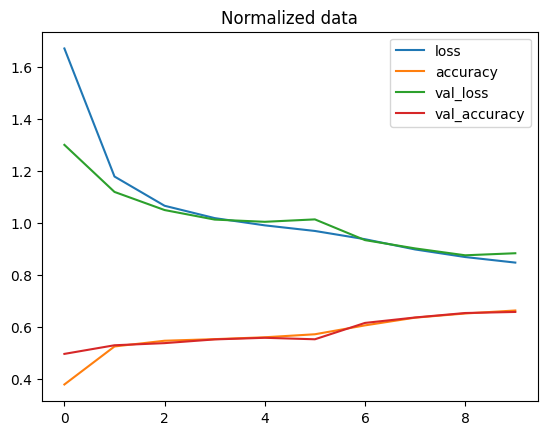

In [69]:
import pandas as pd
# Plot non-normalized data curves
pd.DataFrame(non_norm_hisotry.history).plot(title="Non-normalized data")
# Plot normalized data curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

🔑 **Note:** The same model with even *slightly* different data can produce *dramaticaly* different results. So when you`re comparing models, it's important to make sure you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

## Finding the idea learning rate

In [70]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(X_train_norm,
                        y_train,
                        epochs=40,
                        validation_data=(X_test_norm, y_test),
                        callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2281 - accuracy: 0.5250 - val_loss: 0.8512 - val_accuracy: 0.7207 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7829 - accuracy: 0.7424 - val_loss: 0.7926 - val_accuracy: 0.7280 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6949 - accuracy: 0.7696 - val_loss: 0.6924 - val_accuracy: 0.7537 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6448 - accuracy: 0.7825 - val_loss: 0.6574 - val_accuracy: 0.7766 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6283 - accuracy: 0.7849 - val_loss: 0.6459 - val_accuracy: 0.7798 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6181 - accuracy: 0.7875 - val_loss: 0.6409 - val_accuracy: 0.7816 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

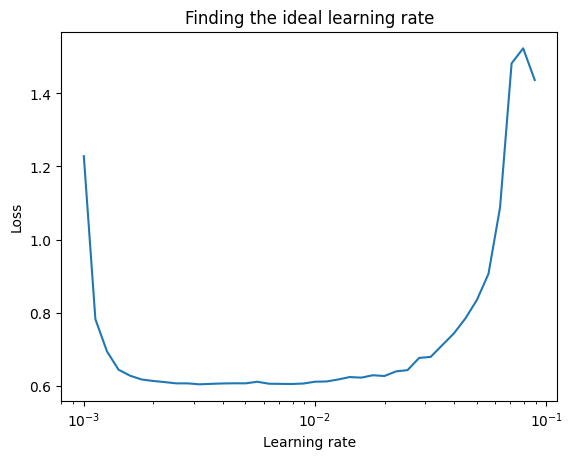

In [71]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [72]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(X_train_norm,
                        y_train,
                        epochs=20,
                        validation_data=(X_test_norm, y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3909 - accuracy: 0.4848 - val_loss: 0.9529 - val_accuracy: 0.6500
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8491 - accuracy: 0.6704 - val_loss: 0.8114 - val_accuracy: 0.6791
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7296 - accuracy: 0.7327 - val_loss: 0.6987 - val_accuracy: 0.7533
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6446 - accuracy: 0.7733 - val_loss: 0.6515 - val_accuracy: 0.7692
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6077 - accuracy: 0.7861 - val_loss: 0.6318 - val_accuracy: 0.7812
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5848 - accuracy: 0.7976 - val_loss: 0.6190 - val_accuracy: 0.7828
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5694 - accuracy: 0.8019 - val_loss: 0.5953 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [73]:
# Make predictions with our model
y_probs = model_4.predict(X_test_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[4.1985192e-08, 3.6476371e-09, 4.7434962e-10, 2.0111345e-05,
        1.0228486e-09, 3.8536063e-01, 3.0324781e-08, 1.2295015e-01,
        6.7160968e-06, 4.9166229e-01],
       [7.1290368e-04, 1.6496028e-04, 5.8500600e-01, 1.7662819e-04,
        3.8276055e-01, 2.5506478e-23, 3.1177653e-02, 0.0000000e+00,
        1.2935413e-06, 3.7955540e-32],
       [1.4153943e-07, 9.9889386e-01, 1.0954691e-03, 9.1130332e-06,
        1.3830070e-06, 9.1609425e-32, 4.0590258e-08, 0.0000000e+00,
        7.2877995e-15, 4.5396155e-25],
       [3.4212519e-08, 9.9957436e-01, 6.0774397e-05, 3.6385644e-04,
        8.9958024e-07, 5.1368442e-28, 1.0241258e-08, 0.0000000e+00,
        1.9508114e-14, 2.0559086e-19],
       [4.8147467e-01, 6.6379685e-06, 3.6834390e-03, 1.1010622e-02,
        6.7479149e-03, 1.0696435e-08, 4.9658591e-01, 7.7364240e-28,
        4.9076113e-04, 4.7565274e-17]], dtype=float32)

In [74]:
y_probs[0], tf.argmax(y_probs[0]).numpy(), class_names[tf.argmax(y_probs[0])]

(array([4.1985192e-08, 3.6476371e-09, 4.7434962e-10, 2.0111345e-05,
        1.0228486e-09, 3.8536063e-01, 3.0324781e-08, 1.2295015e-01,
        6.7160968e-06, 4.9166229e-01], dtype=float32),
 9,
 'Ankle boot')

In [75]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [76]:
# Get loss and accuracy score
loss, accuracy = model_4.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.8151


In [77]:
# Make boring confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[751,   2,  20,  61,   6,   2, 134,   0,  24,   0],
       [  0, 956,  12,  29,   1,   0,   0,   0,   2,   0],
       [ 15,   4, 759,  13, 150,   0,  53,   0,   6,   0],
       [ 33,  36,  24, 814,  44,   2,  36,   0,   9,   2],
       [  0,   2, 168,  29, 702,   0,  94,   0,   5,   0],
       [  0,   0,   0,   1,   0, 898,   0,  45,  22,  34],
       [119,   2, 136,  49, 146,   2, 510,   0,  36,   0],
       [  0,   0,   0,   0,   0,  50,   0, 918,   0,  32],
       [  0,   1,   5,  10,   5,   5,  36,   6, 932,   0],
       [  0,   0,   0,   1,   0,  32,   0,  55,   1, 911]])

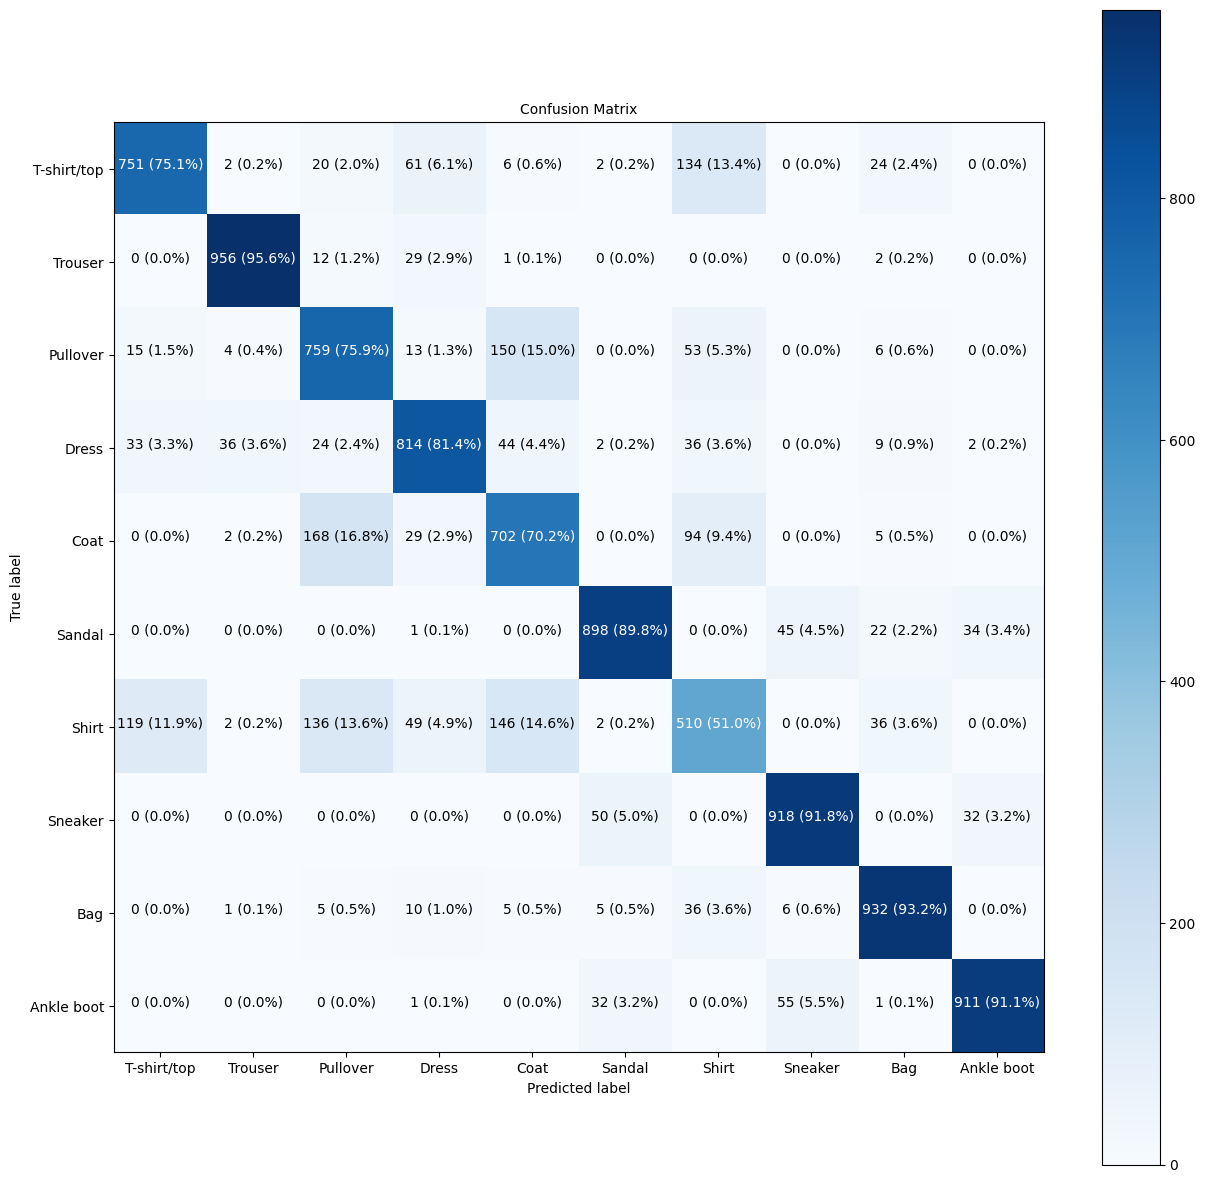

In [78]:
# Make a prettier confusion matrix
plot_confusion_matrix(y_test,
                      y_preds,
                      class_names,
                      (15, 15),
                      10)

🔑 **Note:** Often when working with images and other forms of visual data, it`s a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

How about we create a fun little functio for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [79]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 22ms/step


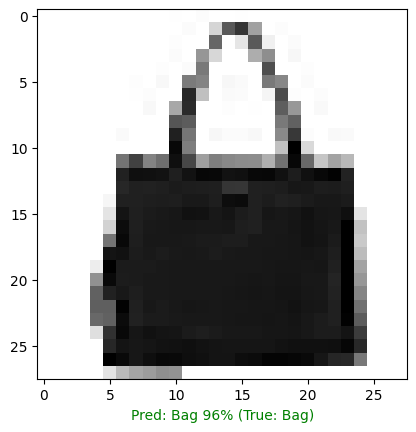

In [80]:
plot_random_image(model=model_4,
                  images=X_test_norm,
                  true_labels=y_test,
                  classes=class_names)

## What patterns is our model learning?

In [81]:
# Find the layers of our most recent model
model_4.layers

In [82]:
# Extract a particular layer
model_4.layers[1]

In [83]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.46955702,  0.37231618,  0.46258023,  0.05819162],
        [ 0.41148418,  1.3068568 ,  1.0035266 , -0.93002003],
        [ 1.3302649 ,  0.7382197 ,  0.4104417 ,  0.6990917 ],
        ...,
        [ 0.29302102, -1.3480427 , -0.09475189, -0.07131258],
        [-0.10235927, -0.06887072,  0.28603446, -0.27531007],
        [-0.0134101 , -0.28069973,  0.537531  , -0.06594383]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector...

In [84]:
# Bias and biases shapes
biases, biases.shape

(array([2.0358436 , 0.9575941 , 1.4905305 , 0.04474733], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is a paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

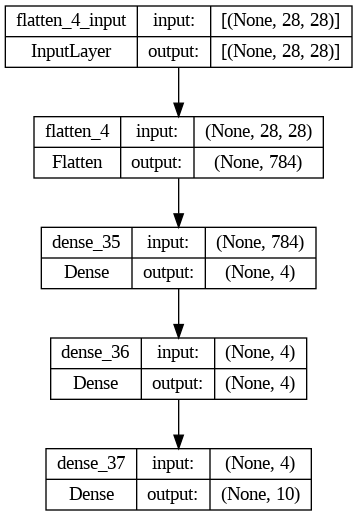

In [85]:
#Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)

## 🛠️Excercises


In [86]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist

### Binary classification

In [87]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

X, y, X.shape, y.shape

(array([[-0.02137124,  0.40618608],
        [ 0.97670045, -0.45832306],
        [ 0.90405882, -0.37651952],
        ...,
        [ 1.66258462, -0.3079193 ],
        [-0.94355873,  0.3278936 ],
        [ 0.79419406,  0.60777171]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [88]:
X[0], y[0], X.shape[0], y.shape[0]

(array([-0.02137124,  0.40618608]), 1, 1000, 1000)

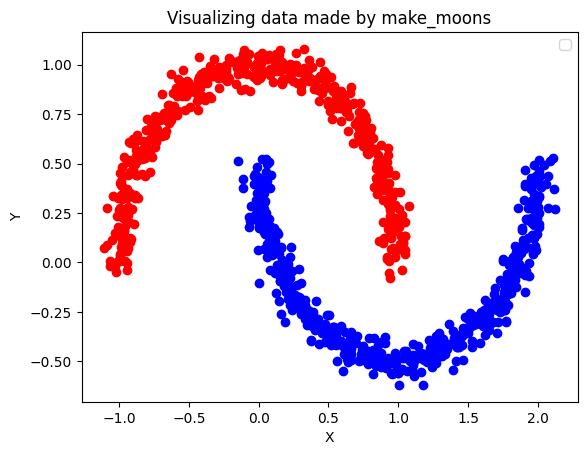

In [89]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualizing data made by make_moons')
plt.legend()
plt.show()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(800, 200)

In [91]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_moons_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_moons_1.compile(optimizer="Adam",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

# Fit the model
model_moons_1.fit(X_train,
                  y_train,
                  epochs=100,
                  validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.6308 - accuracy: 0.7800 - val_loss: 0.6242 - val_accuracy: 0.8400
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.8462 - val_loss: 0.6068 - val_accuracy: 0.8500
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5956 - accuracy: 0.8487 - val_loss: 0.5884 - val_accuracy: 0.8500
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5764 - accuracy: 0.8500 - val_loss: 0.5704 - val_accuracy: 0.8400
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.8475 - val_loss: 0.5521 - val_accuracy: 0.8350
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.8512 - val_loss: 0.5351 - val_accuracy: 0.8350
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.8587 - val_loss: 0.5201 - val_accuracy: 0.8350
Epoch 8/100


In [92]:
loss, accuracy = model_moons_1.evaluate(X_test, y_test)

print("Accuracy:", accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9950
Accuracy: 0.9950000047683716


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


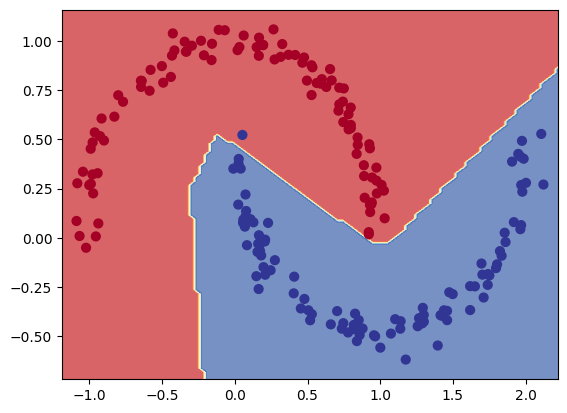

In [93]:
plot_decision_boundary(model_moons_1, X_test, y_test)

### Multiclass classification

In [94]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train[0], y_train[0]

11490434/11490434 [==============================] - 0s 0us/step


(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

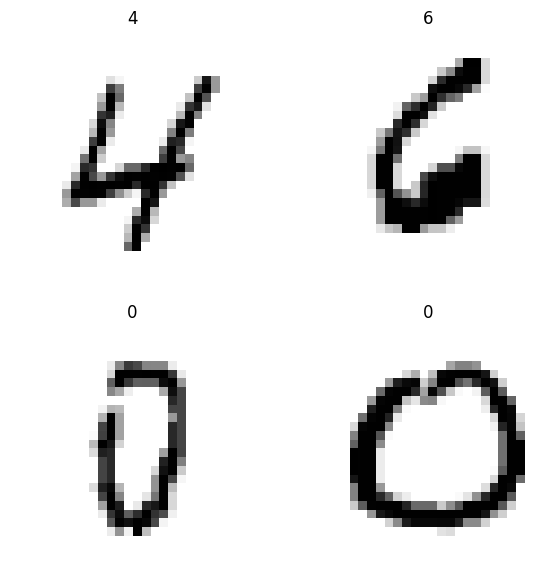

In [95]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

In [96]:
X_train[0].shape, len(np.unique(y_train))

((28, 28), 10)

In [97]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Check the min and max values of the scaled training data
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [98]:
# Set random state
tf.random.set_seed(42)

# Create the model
model_mnist_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mnist_1.compile(optimizer="Adam",
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

# Fit the model
history_mnist_1 = model_mnist_1.fit(X_train_norm,
                                    y_train,
                                    epochs=10,
                                    validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3081 - accuracy: 0.9108 - val_loss: 0.1500 - val_accuracy: 0.9529
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1204 - accuracy: 0.9649 - val_loss: 0.1216 - val_accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0850 - accuracy: 0.9746 - val_loss: 0.0867 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0856 - val_accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0950 - val_accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0812 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0810 - val_accurac

In [99]:
# Make predictions with our model
y_probs = model_mnist_1.predict(X_test_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.0060599e-09, 9.3658635e-08, 6.7416437e-08, 1.8916047e-05,
        2.9713461e-09, 4.1818222e-07, 2.9950833e-10, 9.9904281e-01,
        2.0158902e-08, 9.3755929e-04],
       [6.2484535e-16, 4.0003553e-07, 9.9999803e-01, 1.4905936e-06,
        2.1304125e-14, 3.7891201e-12, 2.1423083e-09, 5.5533838e-14,
        1.2475321e-10, 1.9487741e-14],
       [4.8269857e-08, 9.9941647e-01, 1.1030509e-07, 2.0727591e-06,
        1.5486749e-04, 7.1369630e-09, 3.3165347e-07, 3.8109065e-05,
        3.8103451e-04, 6.8562995e-06],
       [9.9999517e-01, 3.0853705e-11, 4.6732087e-08, 1.3576047e-12,
        1.1686115e-07, 1.0275893e-10, 3.7918896e-06, 1.9506675e-08,
        1.2273548e-08, 8.1755724e-07],
       [2.3571596e-09, 3.0044252e-11, 1.6621930e-09, 2.5471200e-11,
        9.9717534e-01, 5.2301604e-11, 5.3857981e-11, 3.6730672e-08,
        8.0052295e-08, 2.8246103e-03]], dtype=float32)

In [100]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

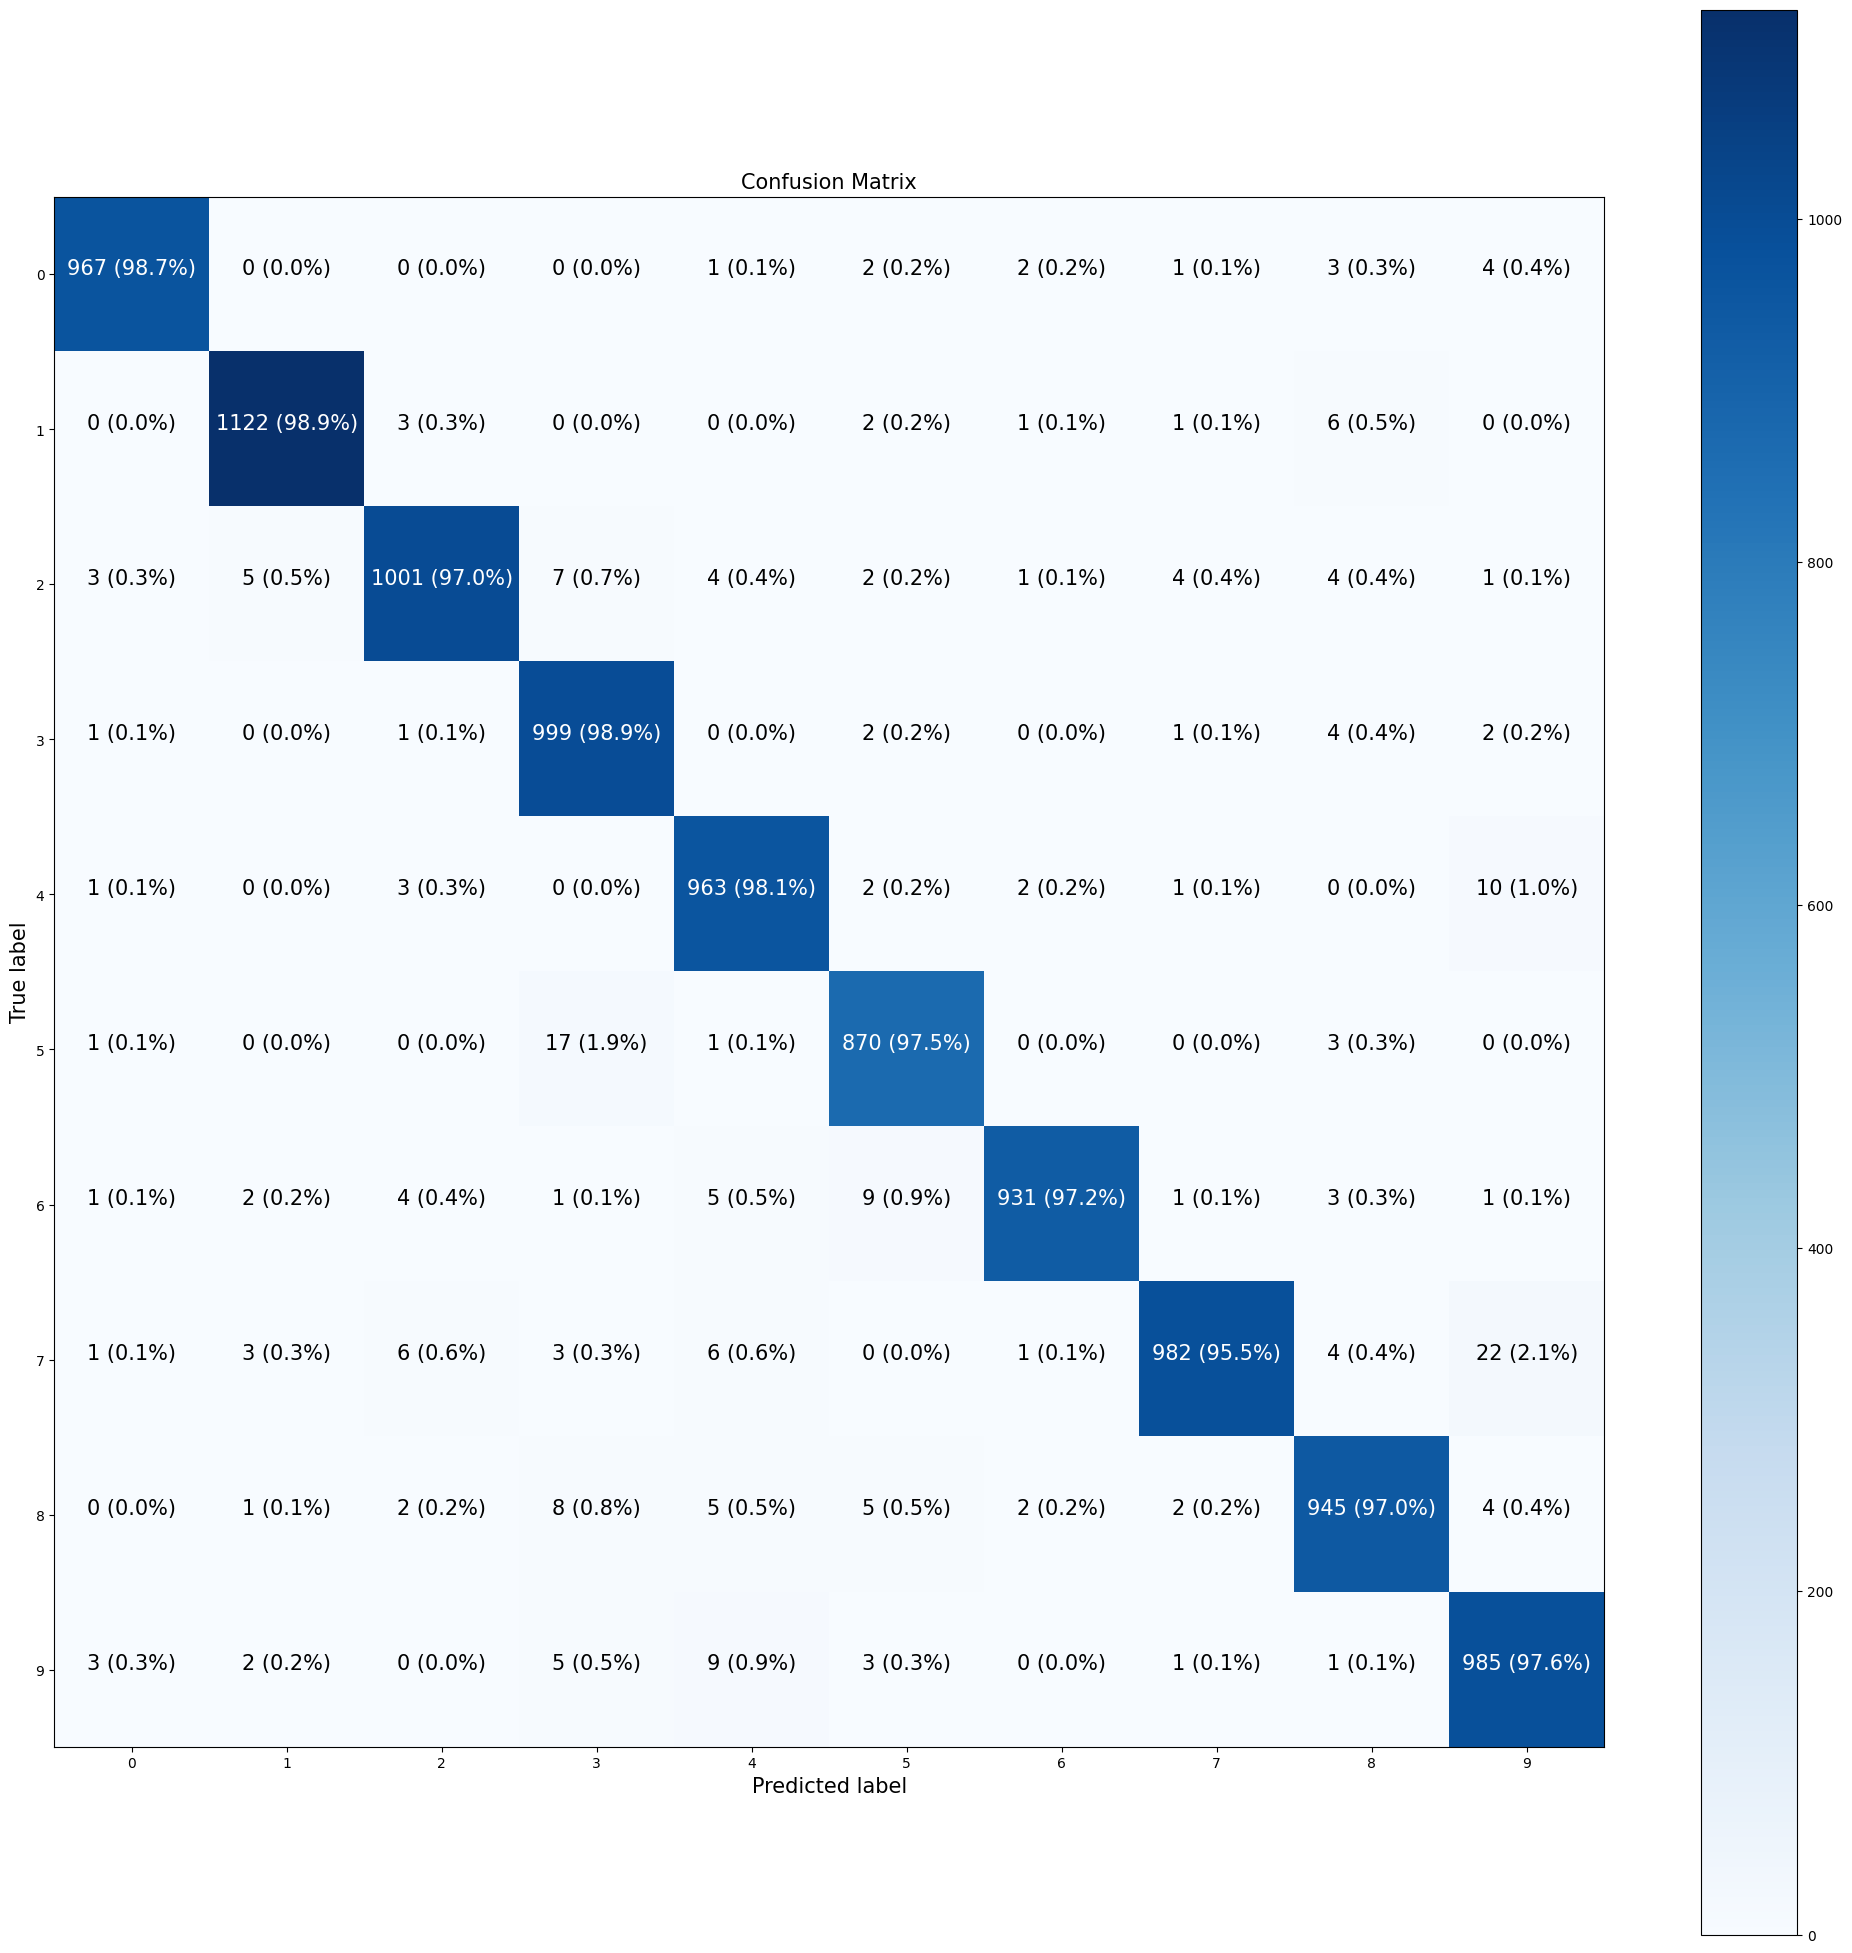

In [101]:
plot_confusion_matrix(y_true=y_test,
                      y_preds=y_preds,
                      figsize=(25, 25))

### Softmax function

In [102]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [103]:
def softmax(x):
    exp_z = np.exp(x - np.max(x))
    return exp_z / exp_z.sum(axis=0)


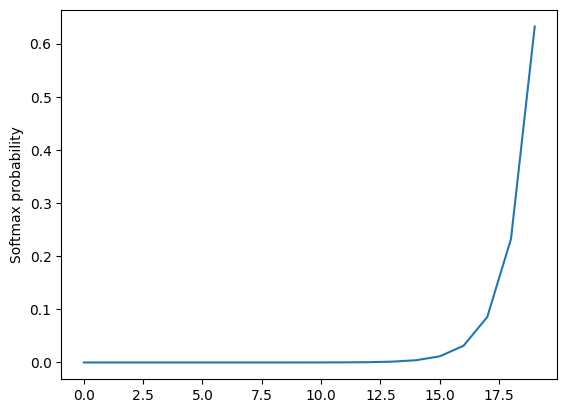

In [104]:
softmax_result = softmax(A)

# Graficando los resultados
plt.plot(range(len(A)), softmax_result)
plt.ylabel('Softmax probability')
plt.show()